In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys, os
from main.functions import FunctionsClass
import pytesseract
from scipy.signal import argrelextrema

In [2]:
func=FunctionsClass()

In [19]:
def find_cut2(derivative,cut_index_arr):
    
    help=0 
    
    for i in range(len(derivative)):
    
        if (derivative[i]==1):
            f_index=i
            for j in range(i,len(derivative)):
                if (derivative[j])==-1:
                    e_index=j
                    cut_index_arr.append(f_index)
                    cut_index_arr.append(e_index+2)
                    break

    for i in range(len(cut_index_arr)):
        if(i==len(cut_index_arr)-1):
            break
        if(i%2!=0):
            start=cut_index_arr[i]
            end=cut_index_arr[i+1]
            avrage=(start+end)/2
            avrage=np.round(avrage,decimals=0)
            avrage=int(avrage)
            cut_index_arr[i]=avrage
            cut_index_arr[i+1]=avrage+1 

<function matplotlib.pyplot.show(close=None, block=None)>

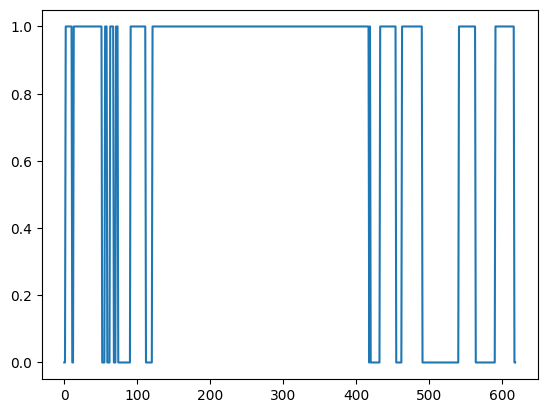

In [33]:
#gereftan ax scan shode
orgiganl_image=cv2.imread("../images/passport3.PNG",cv2.IMREAD_COLOR)
#bordan dar fazaie greyscale
orgiganl_image=cv2.cvtColor(orgiganl_image, cv2.COLOR_BGR2GRAY)
#barabar akrdan DPI ha
orgiganl_image=func.equalize_dpi(orgiganl_image)
#gereftan copy az ax asli
copy_image=orgiganl_image.copy()
#reverse krdn ax asli
reversed_img=func.revrese(copy_image)
#thereshhold ax asli
thresholded_img=func.thresholding(reversed_img,120)
#normal krdn ax asli
normaled_img=func.normalize(thresholded_img)
# normaled_img=normaled_img*255
# normaled_img=normaled_img.astype(np.uint8)
# cv2.imwrite("org.jpg",normaled_img)
horizontal_sum=func.horizontal_summation(normaled_img)
horizontal_thresh=func.handwritten_thresh_array(horizontal_sum,20)
cut_index_array=[]
derative=func.deriv(horizontal_thresh)
find_cut2(derative,cut_index_array)

size=len(cut_index_array)
cut_index_array=cut_index_array[size-4:size]
# cv2.imshow("normaled_img",normaled_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
h,w=normaled_img.shape
line1=normaled_img[cut_index_array[0]-3:cut_index_array[1]+3,0:w]
line2=normaled_img[cut_index_array[2]-3:cut_index_array[3]+3,0:w]
cv2.imshow("sdsd",line1)
cv2.waitKey(0)
cv2.imshow("sdsd",line2)
cv2.waitKey(0)
cv2.destroyAllWindows()




        



x = np.arange(len(horizontal_sum))
y=horizontal_thresh
plt.plot(x,y)
plt.show


